In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("Data/T1.csv")
df.describe()
# df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [2]:
# df.head()

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%d %m %Y %H:%M")
df['Month'] = df['Date/Time'].dt.month
df['Week'] = df['Date/Time'].dt.isocalendar().week
df['day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Min'] = df['Date/Time'].dt.minute

df.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Week,day,Hour,Min
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0,40
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,1,1,1,0,50
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,1,1,1,1,0
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,1,1,1,1,10
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,1,1,1,1,20
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,1,1,1,1,30


In [4]:
df[df.isnull().any(axis=1)]

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Week,day,Hour,Min


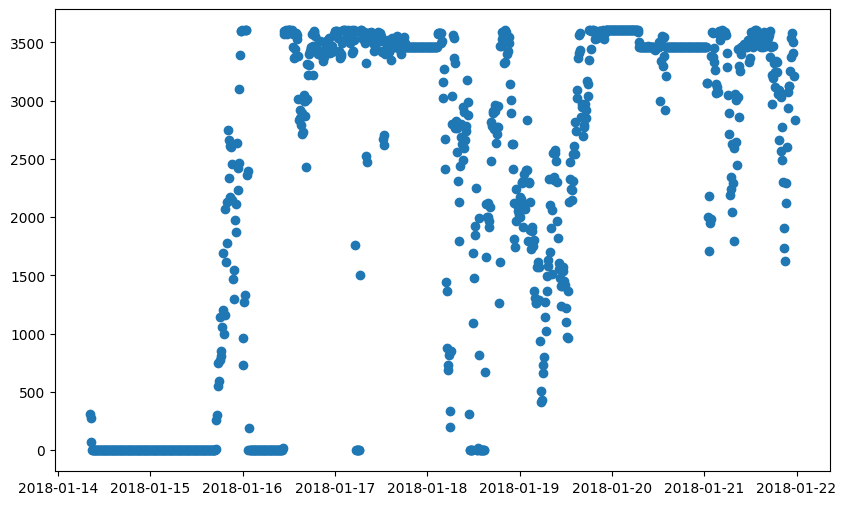

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Date/Time"][1900:3000],df['LV ActivePower (kW)'][1900:3000],)

In [5]:
# plt.scatter(df['Date/Time'], df['Min'], s=1, alpha=0.5, label='Theoretical Power Curve')


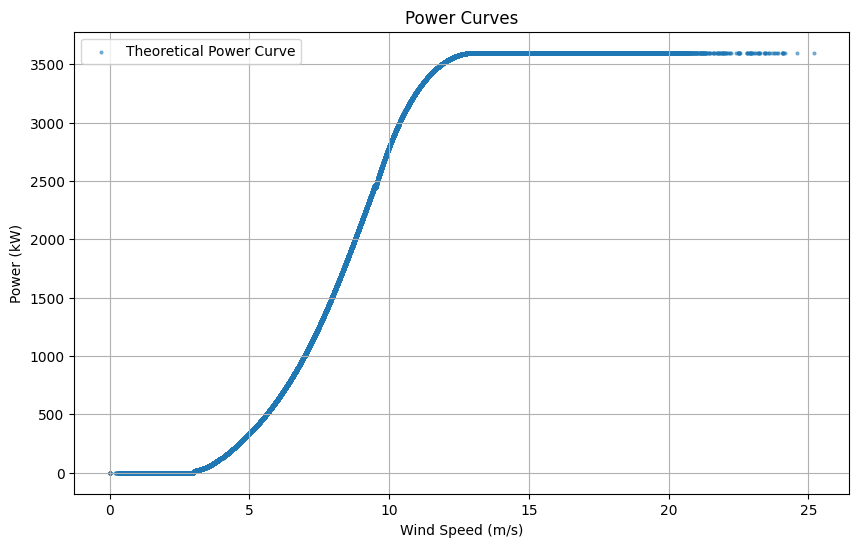

In [47]:
# Plot the power curves
plt.figure(figsize=(10, 6))
plt.scatter(df['Wind Speed (m/s)'], df['Theoretical_Power_Curve (KWh)'], s=4, alpha=0.5, label='Theoretical Power Curve')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Power Curves')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], s=1, alpha=0.6, label='Live Power Curve')
# plt.xlabel('Wind Speed (m/s)')
# plt.ylabel('Power (kW)')
# plt.title('Power Curves')
# # plt.plot()

In [8]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
# Display rows with any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing_values)

Missing values per column:
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Month                            0
Week                             0
day                              0
Hour                             0
Min                              0
dtype: int64


In [10]:
# Load your data
ds = pd.read_csv("Data/T1.csv")

# Convert the timestamp column to datetime if it isn’t already
ds['Date/Time'] = pd.to_datetime(ds['Date/Time'],format="%d %m %Y %H:%M")

ds_Sort = df.sort_values(by='Date/Time').reset_index(drop=True)
df['time_diff'] = df['Date/Time'].diff().dt.total_seconds() / 60
inconsistent_intervals = df[df['time_diff'] != 10]

# Display the inconsistent intervals, if any
if not inconsistent_intervals.empty:
    print("Inconsistent intervals found:")
    print(inconsistent_intervals[['Date/Time', 'time_diff']])
else:
    print("All intervals are consistently 10 minutes.")



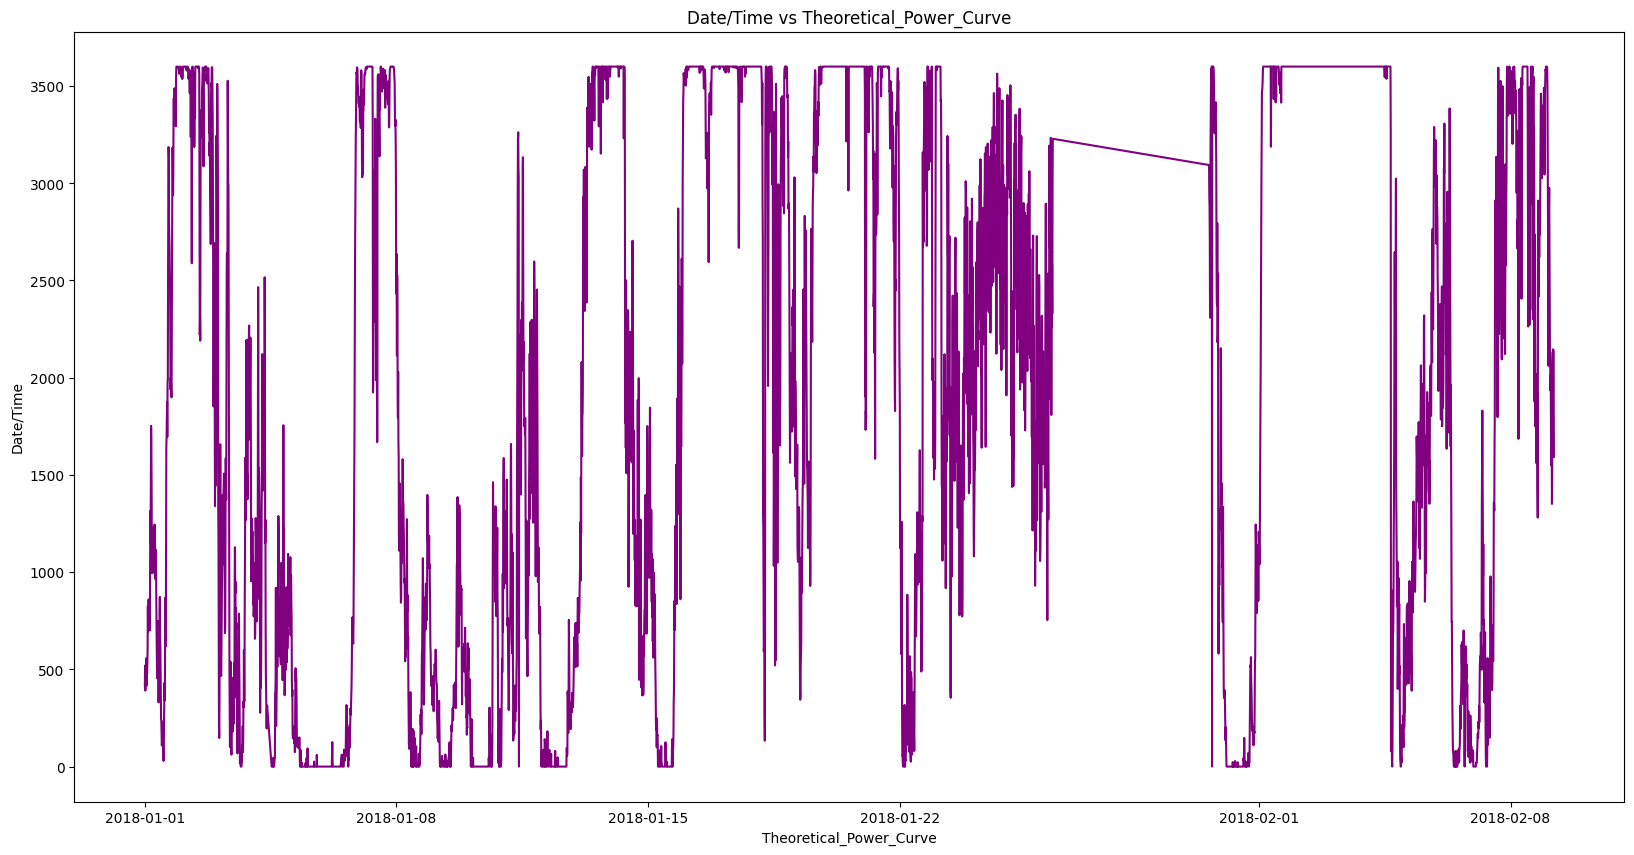

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(df['Date/Time'][0:5000],
        df['Theoretical_Power_Curve (KWh)'][0:5000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Data/T1.csv")

# Convert the timestamp column to datetime format (replace 'timestamp_column' with the actual column name)
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format="%d %m %Y %H:%M")

# Set the timestamp column as the index for easier time manipulation
df.set_index('Date/Time', inplace=True)

# Define the expected frequency of your data (e.g., 'H' for hourly, 'T' for minute)
expected_freq = 'H'  # Change this according to your dataset's expected frequency

# Create a complete time range with the expected frequency
complete_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)

# Reindex your DataFrame to include all expected timestamps, filling missing periods with NaNs
df_reindexed = df.reindex(complete_time_range)

# Extract the missing timestamps
missing_periods = df_reindexed[df_reindexed.isnull().all(axis=1)].index

# Convert to DataFrame for better readability
missing_periods_df = pd.DataFrame(missing_periods, columns=['missing_timestamps'])
print(missing_periods_df)


     missing_timestamps
0   2018-01-04 10:00:00
1   2018-01-04 11:00:00
2   2018-01-04 12:00:00
3   2018-01-06 11:00:00
4   2018-01-26 07:00:00
..                  ...
333 2018-11-14 09:00:00
334 2018-11-14 10:00:00
335 2018-11-14 11:00:00
336 2018-12-04 14:00:00
337 2018-12-17 10:00:00

[338 rows x 1 columns]


In [3]:
# Example: Linear interpolation to fill missing values
df = df.interpolate(method='linear')


In [4]:
# Define the expected frequency of your data (e.g., 'H' for hourly, 'T' for minute)
expected_freq = 'H'  # Change this according to your dataset's expected frequency

# Create a complete time range with the expected frequency
complete_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=expected_freq)

# Reindex your DataFrame to include all expected timestamps, filling missing periods with NaNs
df_reindexed = df.reindex(complete_time_range)

# Extract the missing timestamps
missing_periods = df_reindexed[df_reindexed.isnull().all(axis=1)].index

# Convert to DataFrame for better readability
missing_periods_df = pd.DataFrame(missing_periods, columns=['missing_timestamps'])
print(missing_periods_df)

     missing_timestamps
0   2018-01-04 10:00:00
1   2018-01-04 11:00:00
2   2018-01-04 12:00:00
3   2018-01-06 11:00:00
4   2018-01-26 07:00:00
..                  ...
333 2018-11-14 09:00:00
334 2018-11-14 10:00:00
335 2018-11-14 11:00:00
336 2018-12-04 14:00:00
337 2018-12-17 10:00:00

[338 rows x 1 columns]


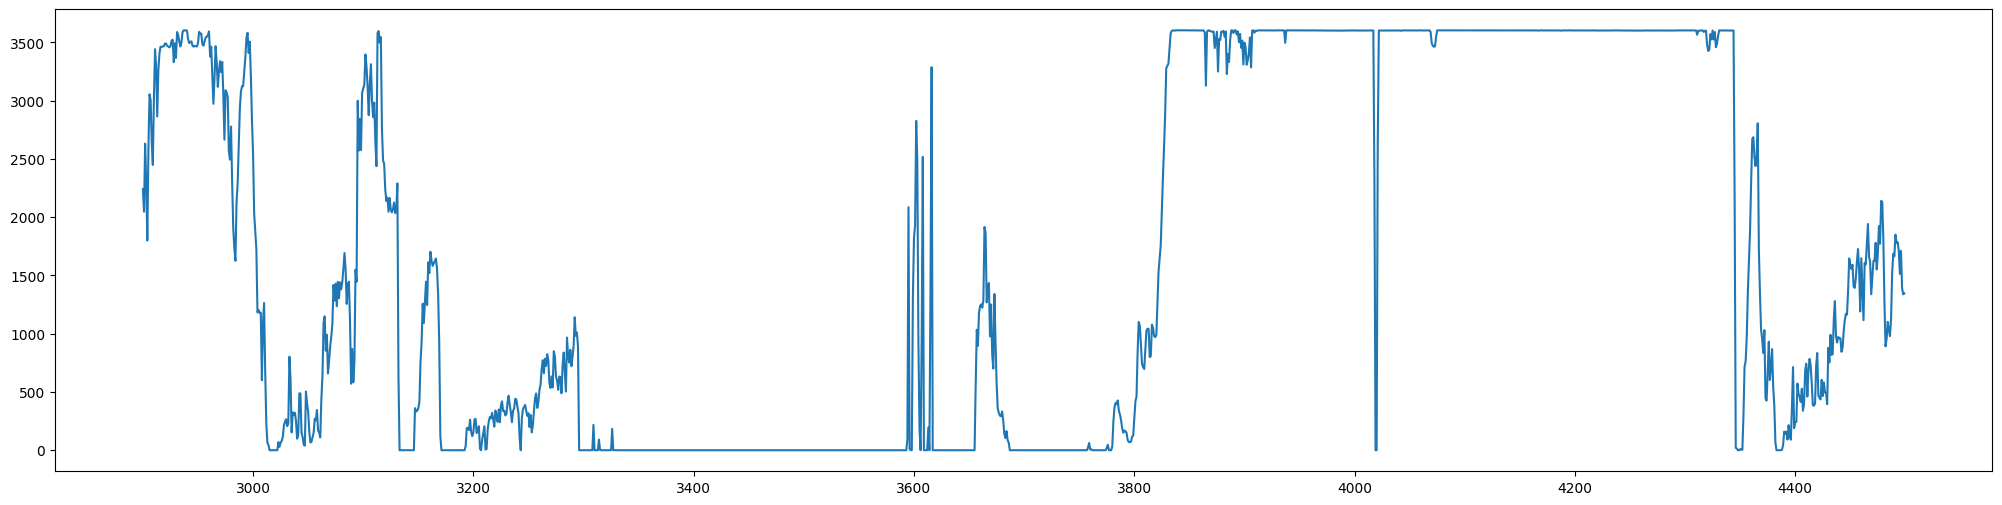

In [48]:

import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
plt.plot(df['LV ActivePower (kW)'][2900:4500])


In [65]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your dataset
data = pd.read_csv("Data/T1.csv")

# Separate timestamp column if needed
timestamps = data['Date/Time']  # Assuming your timestamp column is named 'Date'
data = data.drop(columns=['Date/Time'])

# Optional: Scale the data before imputation (especially useful if features have different scales)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [69]:

# Initialize and apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_scaled)  # Returns a NumPy array

# Convert back to DataFrame and revert scaling if needed
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
# data_imputed = pd.DataFrame(scaler.inverse_transform(data_imputed), columns=data.columns)


# Reattach timestamp column
data_imputed['Date/time'] = timestamps

In [70]:

pd.DataFrame(data_imputed['Theoretical_Power_Curve (KWh)'])

,Theoretical_Power_Curve (KWh)
0,0.115647
1,0.144422
2,0.108583
3,0.143369
4,0.136584
...,...
50525,0.943664
50526,0.325849
50527,0.496746
50528,0.671773


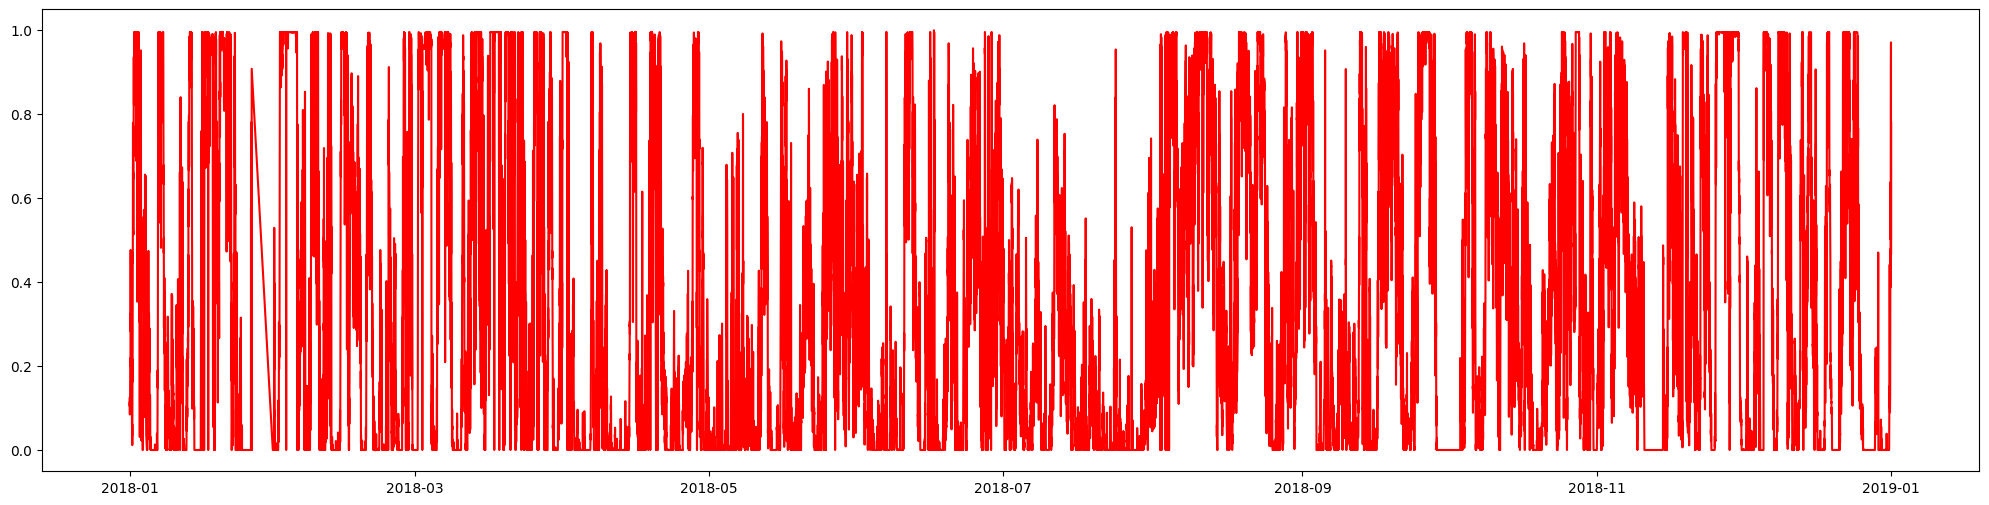

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
plt.plot(df['Date/Time'],data_imputed['LV ActivePower (kW)'],'red')
# plt.plot(df['LV ActivePower (kW)'][2900:4500])

In [60]:
data_imputed.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date/time
0,380.047791,5.311336,416.328908,259.994904,01 01 2018 00:00
1,453.769196,5.672167,519.917511,268.641113,01 01 2018 00:10
2,306.376587,5.216037,390.900016,272.564789,01 01 2018 00:20
3,419.645905,5.659674,516.127569,271.258087,01 01 2018 00:30
4,380.650696,5.577941,491.702972,265.674286,01 01 2018 00:40


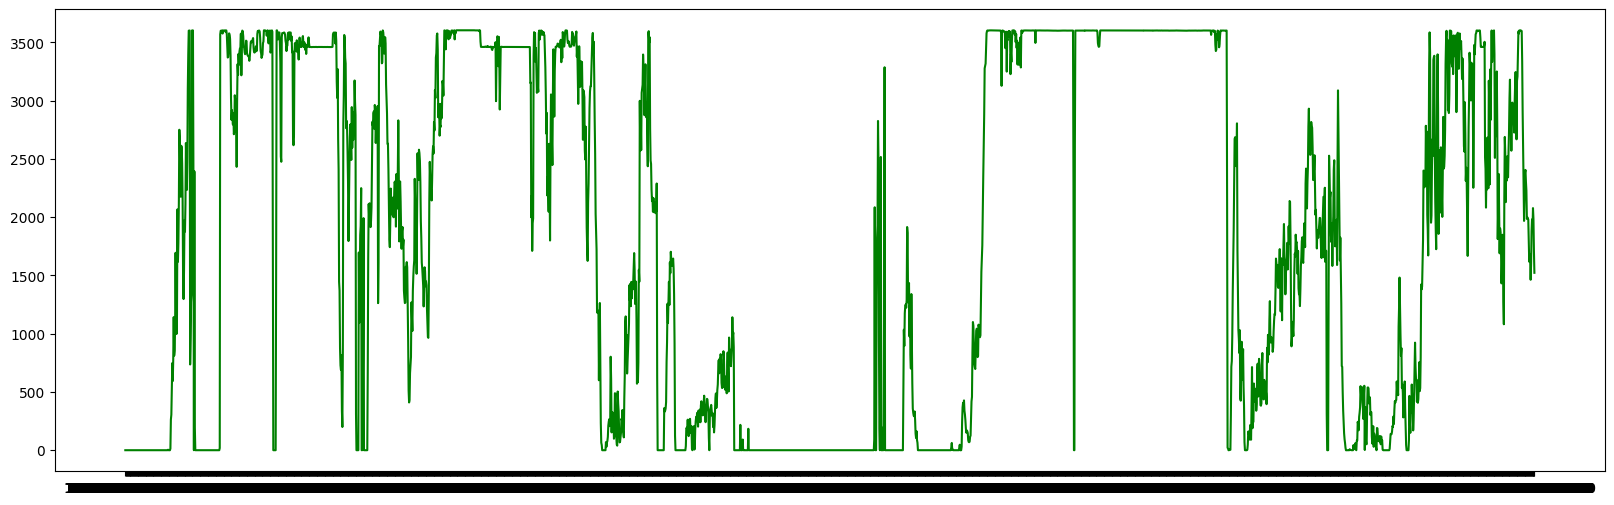

In [64]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,6))

# Add x-axis and y-axis
ax.plot(data_imputed['Date/time'][2000:5000],
        data_imputed['LV ActivePower (kW)'][2000:5000],
        color='green')

In [74]:
# Determine the cut-in speed based on theoretical power curve
cut_in_speed = df[df['Theoretical_Power_Curve (KWh)'] > 0]['Wind Speed (m/s)'].min()
cut_in_speed = round(cut_in_speed, 1)
# Filter data based on this cut-in speed
filtered_data = df[df['Wind Speed (m/s)'] >= cut_in_speed]

# Determine the maximum power output
max_power = df['LV ActivePower (kW)'].max()

# Determine the least wind speed at which the maximum power is reached
rated_velocity = df[df['LV ActivePower (kW)'] == max_power]['Wind Speed (m/s)'].min()
rated_velocity = round(rated_velocity,1 )
print("The cut-in speed is " + str(cut_in_speed))
print("The rated velocity is " + str(rated_velocity))

The cut-in speed is 3.0
The rated velocity is 17.9


In [77]:
# Filter for speeds below 3 m/s or above 17.9 m/s
speed_outliers = df[(df['Wind Speed (m/s)'] < 3) | (df['Wind Speed (m/s)'] > 17.9)]

# Display the timestamps of the filtered rows
outlier_timestamps = speed_outliers['Date/Time'][0:250]
print(outlier_timestamps)


384    2018-01-03 16:00:00
385    2018-01-03 16:10:00
386    2018-01-03 16:20:00
387    2018-01-03 16:30:00
491    2018-01-04 12:40:00
               ...        
1326   2018-01-10 08:30:00
1327   2018-01-10 08:40:00
1328   2018-01-10 08:50:00
1329   2018-01-10 09:00:00
1330   2018-01-10 09:10:00
Name: Date/Time, Length: 250, dtype: datetime64[ns]
